In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/waterQuality1.csv')
print(df.shape)
df.head()


(7999, 21)


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


## Step 1: Problem Definition
- To determine whether water is clean based on certain mineral values.


## Chemical Contaminants

- **Aluminium**: A metallic element that can enter water supplies through natural deposits or treatment processes. High levels may cause water discoloration and potential health effects.

- **Ammonia**: A compound of nitrogen and hydrogen that can indicate bacterial contamination, sewage, or animal waste. High levels may affect water taste and odor.

- **Arsenic**: A naturally occurring element found in rocks and soil. Long-term exposure to elevated levels can cause serious health problems, including cancer.

- **Barium**: A metallic element that occurs naturally in mineral deposits. Excessive levels can cause increased blood pressure and other cardiovascular issues.

- **Cadmium**: A heavy metal that can enter water through industrial discharge or deteriorating galvanized pipes. It's toxic and can accumulate in the kidneys.

- **Chloramine**: A disinfectant made from chlorine and ammonia used to treat drinking water. While necessary for disinfection, high levels can cause respiratory issues.

- **Chromium**: A metallic element that exists in various forms. Some forms are harmless, while others (like hexavalent chromium) can be dangerous to health.

## Biological Contaminants

- **Bacteria**: Microscopic organisms that can cause various waterborne diseases. Common examples include E. coli and coliform bacteria.

- **Viruses**: Microscopic pathogens that can cause various illnesses through contaminated water. They're typically removed through proper water treatment.

## Nitrogen Compounds

- **Nitrates**: Compounds formed from nitrogen and oxygen. High levels often result from agricultural runoff and can be particularly dangerous for infants.

- **Nitrites**: Similar to nitrates but in a different chemical form. Can be harmful, especially to infants and pregnant women.

## Heavy Metals and Radioactive Elements

- **Mercury**: A toxic heavy metal that can accumulate in the body. Even small amounts can be harmful, particularly to developing fetuses.

- **Perchlorate**: A chemical that can interfere with thyroid function. Often associated with rocket fuel, explosives, and some fertilizers.

- **Radium**: A radioactive element that occurs naturally in some groundwater sources. Long-term exposure can increase cancer risk.

- **Selenium**: A naturally occurring element that's essential in small amounts but toxic at high levels. Can enter water through industrial processes.

- **Silver**: A metallic element that can enter water through industrial discharge or natural deposits. High levels can cause skin discoloration.

- **Uranium**: A radioactive element that can occur naturally in groundwater. Long-term exposure to elevated levels can cause kidney problems.

## Target Variable

- **is_safe**: A binary indicator (likely 0 or 1) showing whether the water sample meets safety standards based on the levels of all measured contaminants.


In [8]:
# There is no null value in df
df.isnull().sum()

,0
aluminium,0
ammonia,0
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


# Step 2: Data Analysis
- Explore distrubitions of data.
- The dataset has 7,999 complete records with no missing values (all counts are equal)
- All parameters have valid numerical measurements ranging from 0 to their respective maximum values (no negative values)

In [9]:
# There is no meaningless value in df for min and max values
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [10]:
# All data's are float except ammonia and is_safe. There is no null values in df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

# Step 3: Data Cleaning
- Remove rows with '#NUM!' in 'ammonia' and 'is_safe' columns.
- Data type arrangment

In [11]:
# Now there is no text values in the df
df[['ammonia', 'is_safe']] = df[['ammonia', 'is_safe']].astype(str)
df['ammonia'] = df['ammonia'].str.strip()
df['is_safe'] = df['is_safe'].str.strip()
df = df[(df['ammonia'] != '#NUM!') & (df['is_safe'] != '#NUM!')]
df[['ammonia', 'is_safe']] = df[['ammonia', 'is_safe']].astype(float)
print((df['is_safe']=='#NUM!').sum())
print((df['ammonia']=='#NUM!').sum())
df.info()

0
0
<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium

<ipython-input-11-f9267b069875>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['ammonia', 'is_safe']] = df[['ammonia', 'is_safe']].astype(float)


# Step 4: Data Visualization
- Explore data by using different kind of data visualization methods.

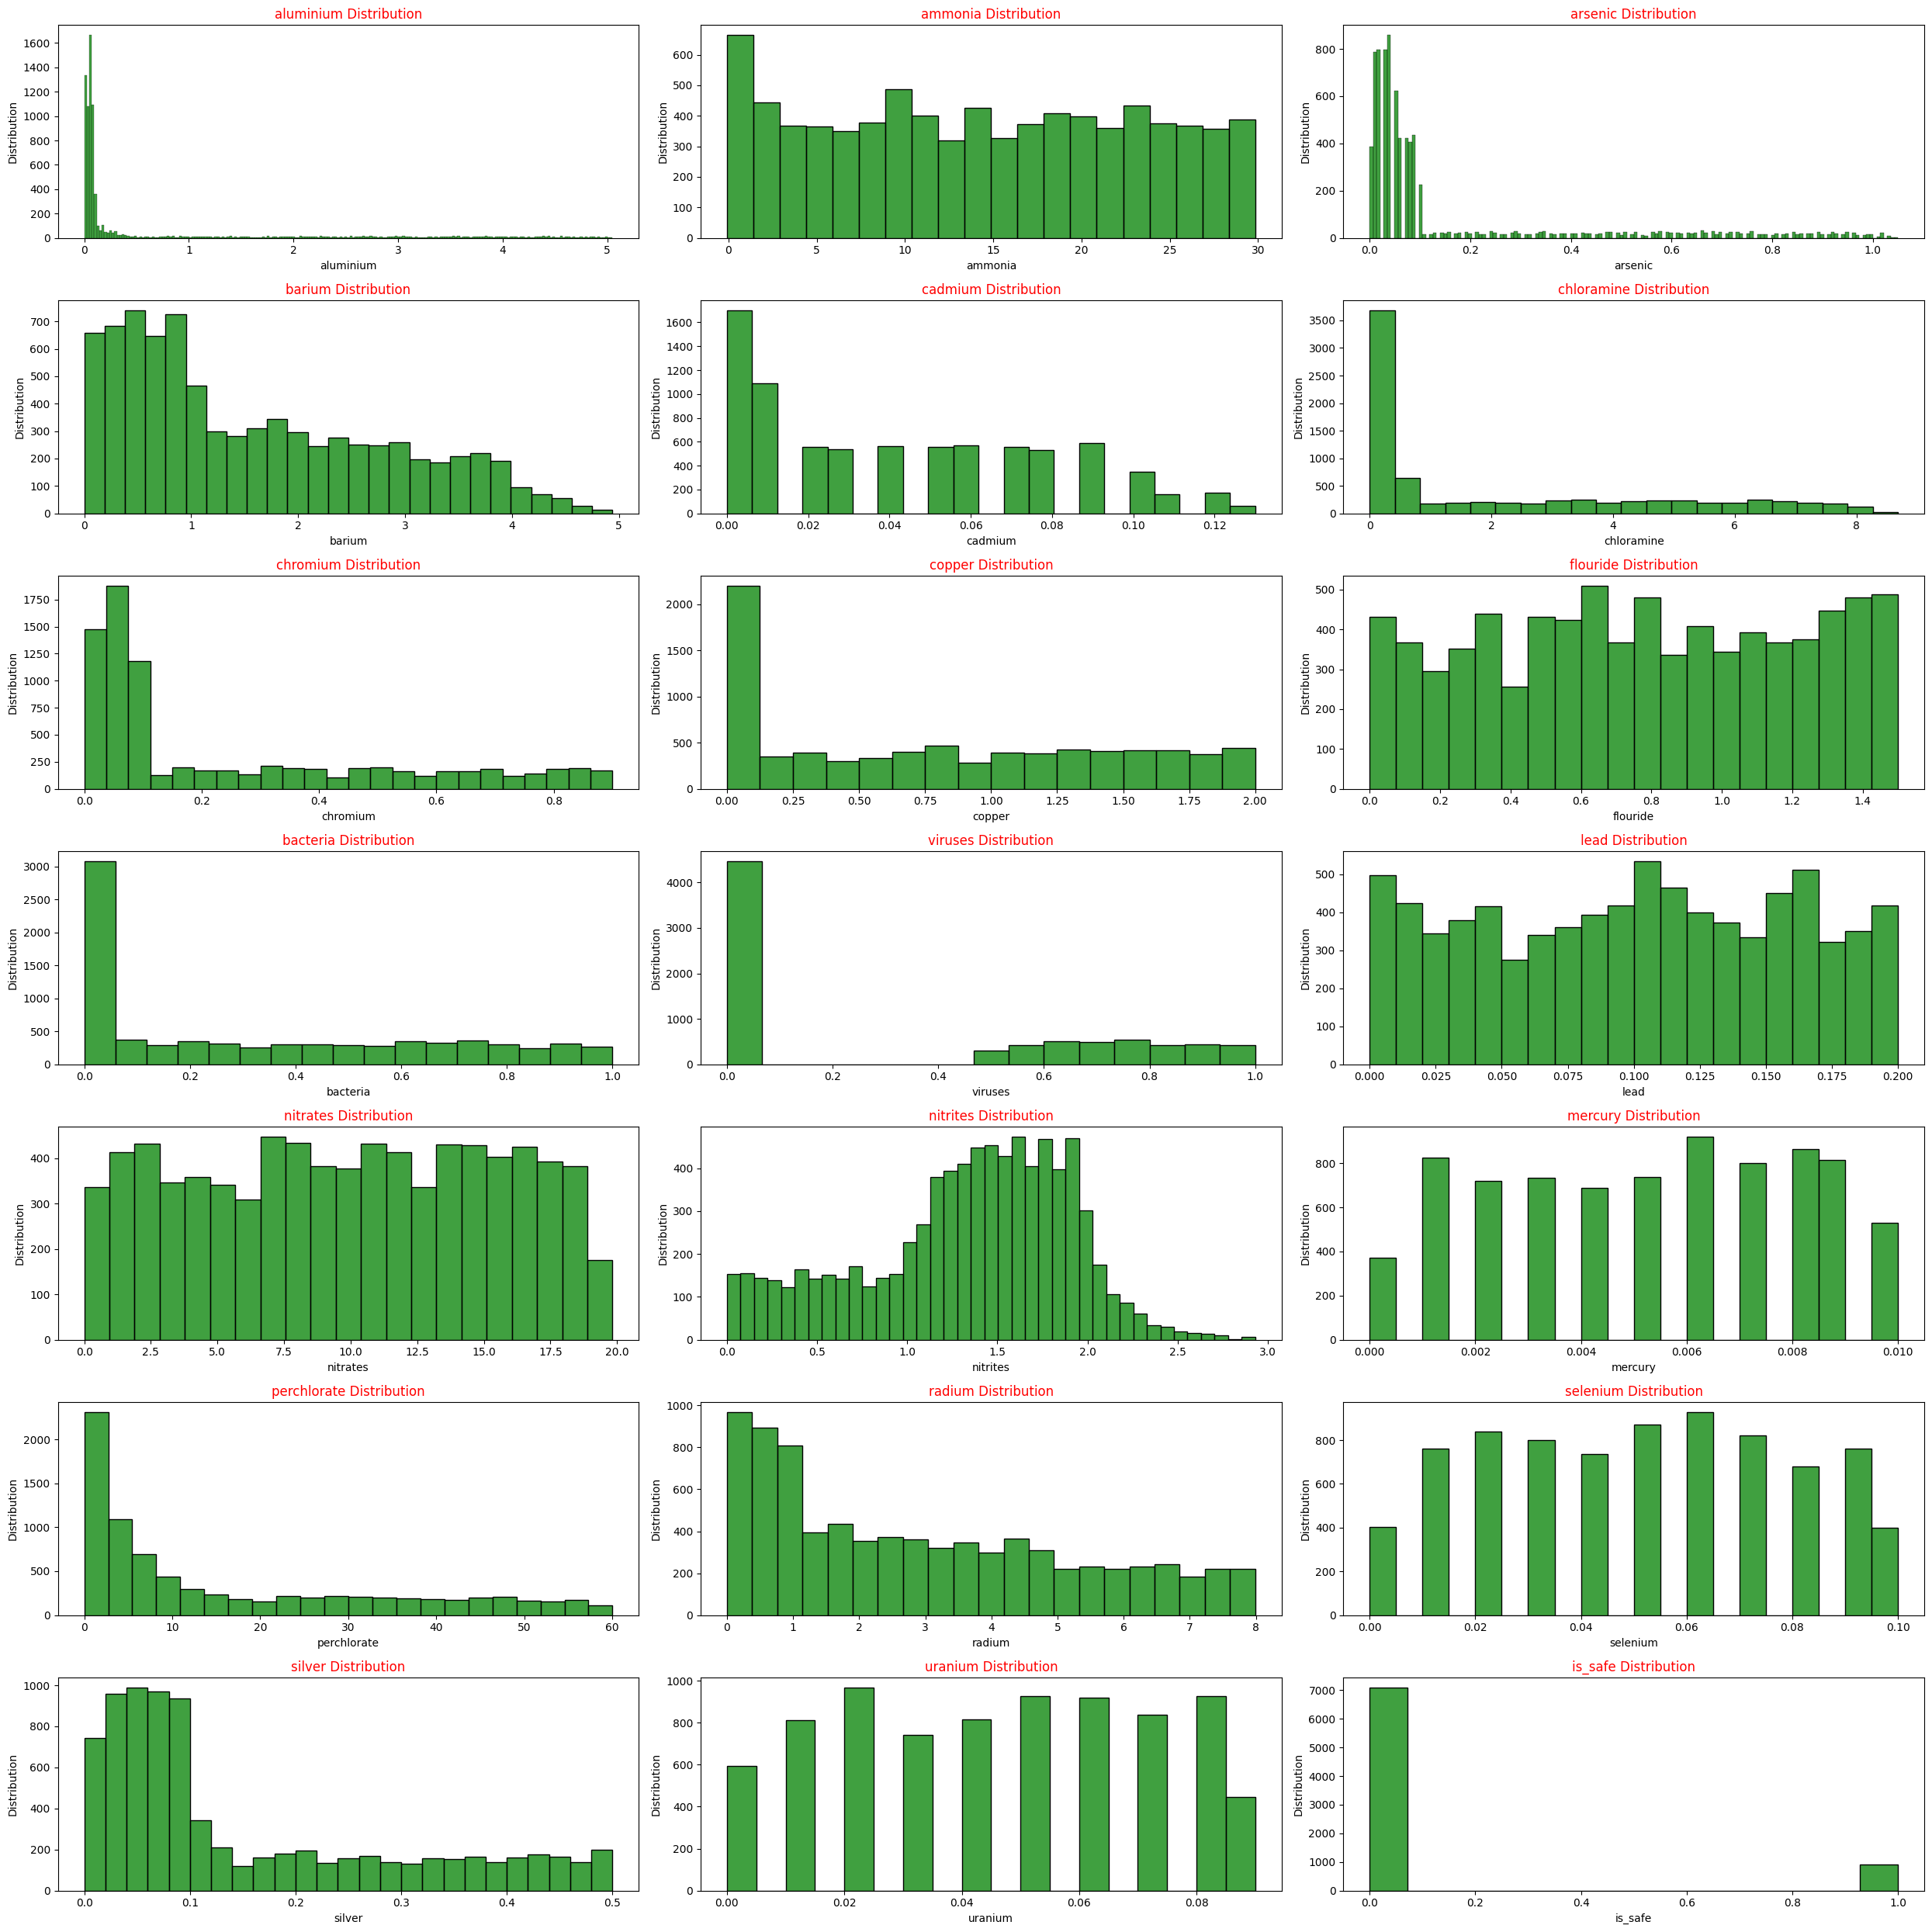

In [12]:
f = plt.figure(figsize=(25, 25))
for i, col in enumerate(df.columns):
    ax = f.add_subplot(7, 3, i+1)
    sns.histplot(df[col].ffill(), kde=False, color='green')
    ax.set_title(col + " Distribution", color='red')
    plt.ylabel('Distribution')
f.tight_layout()


## Explanation:
- **Aluminium**: Most samples have very low concentrations, with rare high-value outliers

- **Chloramine**: Strong concentration of values near zero, with a long tail

- **Chromium**: Majority of samples show low levels, with decreasing frequency at higher concentrations

- **Bacteria**: Strong peaks at 0 and small representations across other values

- **Viruses**: Most samples at 0, with a small secondary peak near 1.0

- **is_safe**: Binary distribution showing most samples are safe (0), with few unsafe samples (1)

- **Nitrites**: Shows a somewhat bell-shaped distribution

- **Mercury**: Relatively symmetric distribution around the mean

- **Selenium**: Fairly even distribution across its range

- **Uranium**: Relatively consistent frequency across different concentration levels

- **Barium**: Gradual decrease in frequency as concentration increase

- **Ammonia**: Multiple peaks across the range

- **Nitrates**: Shows several distinct peaks

- **Perchlorate**: Multiple peaks with decreasing frequency at higher values

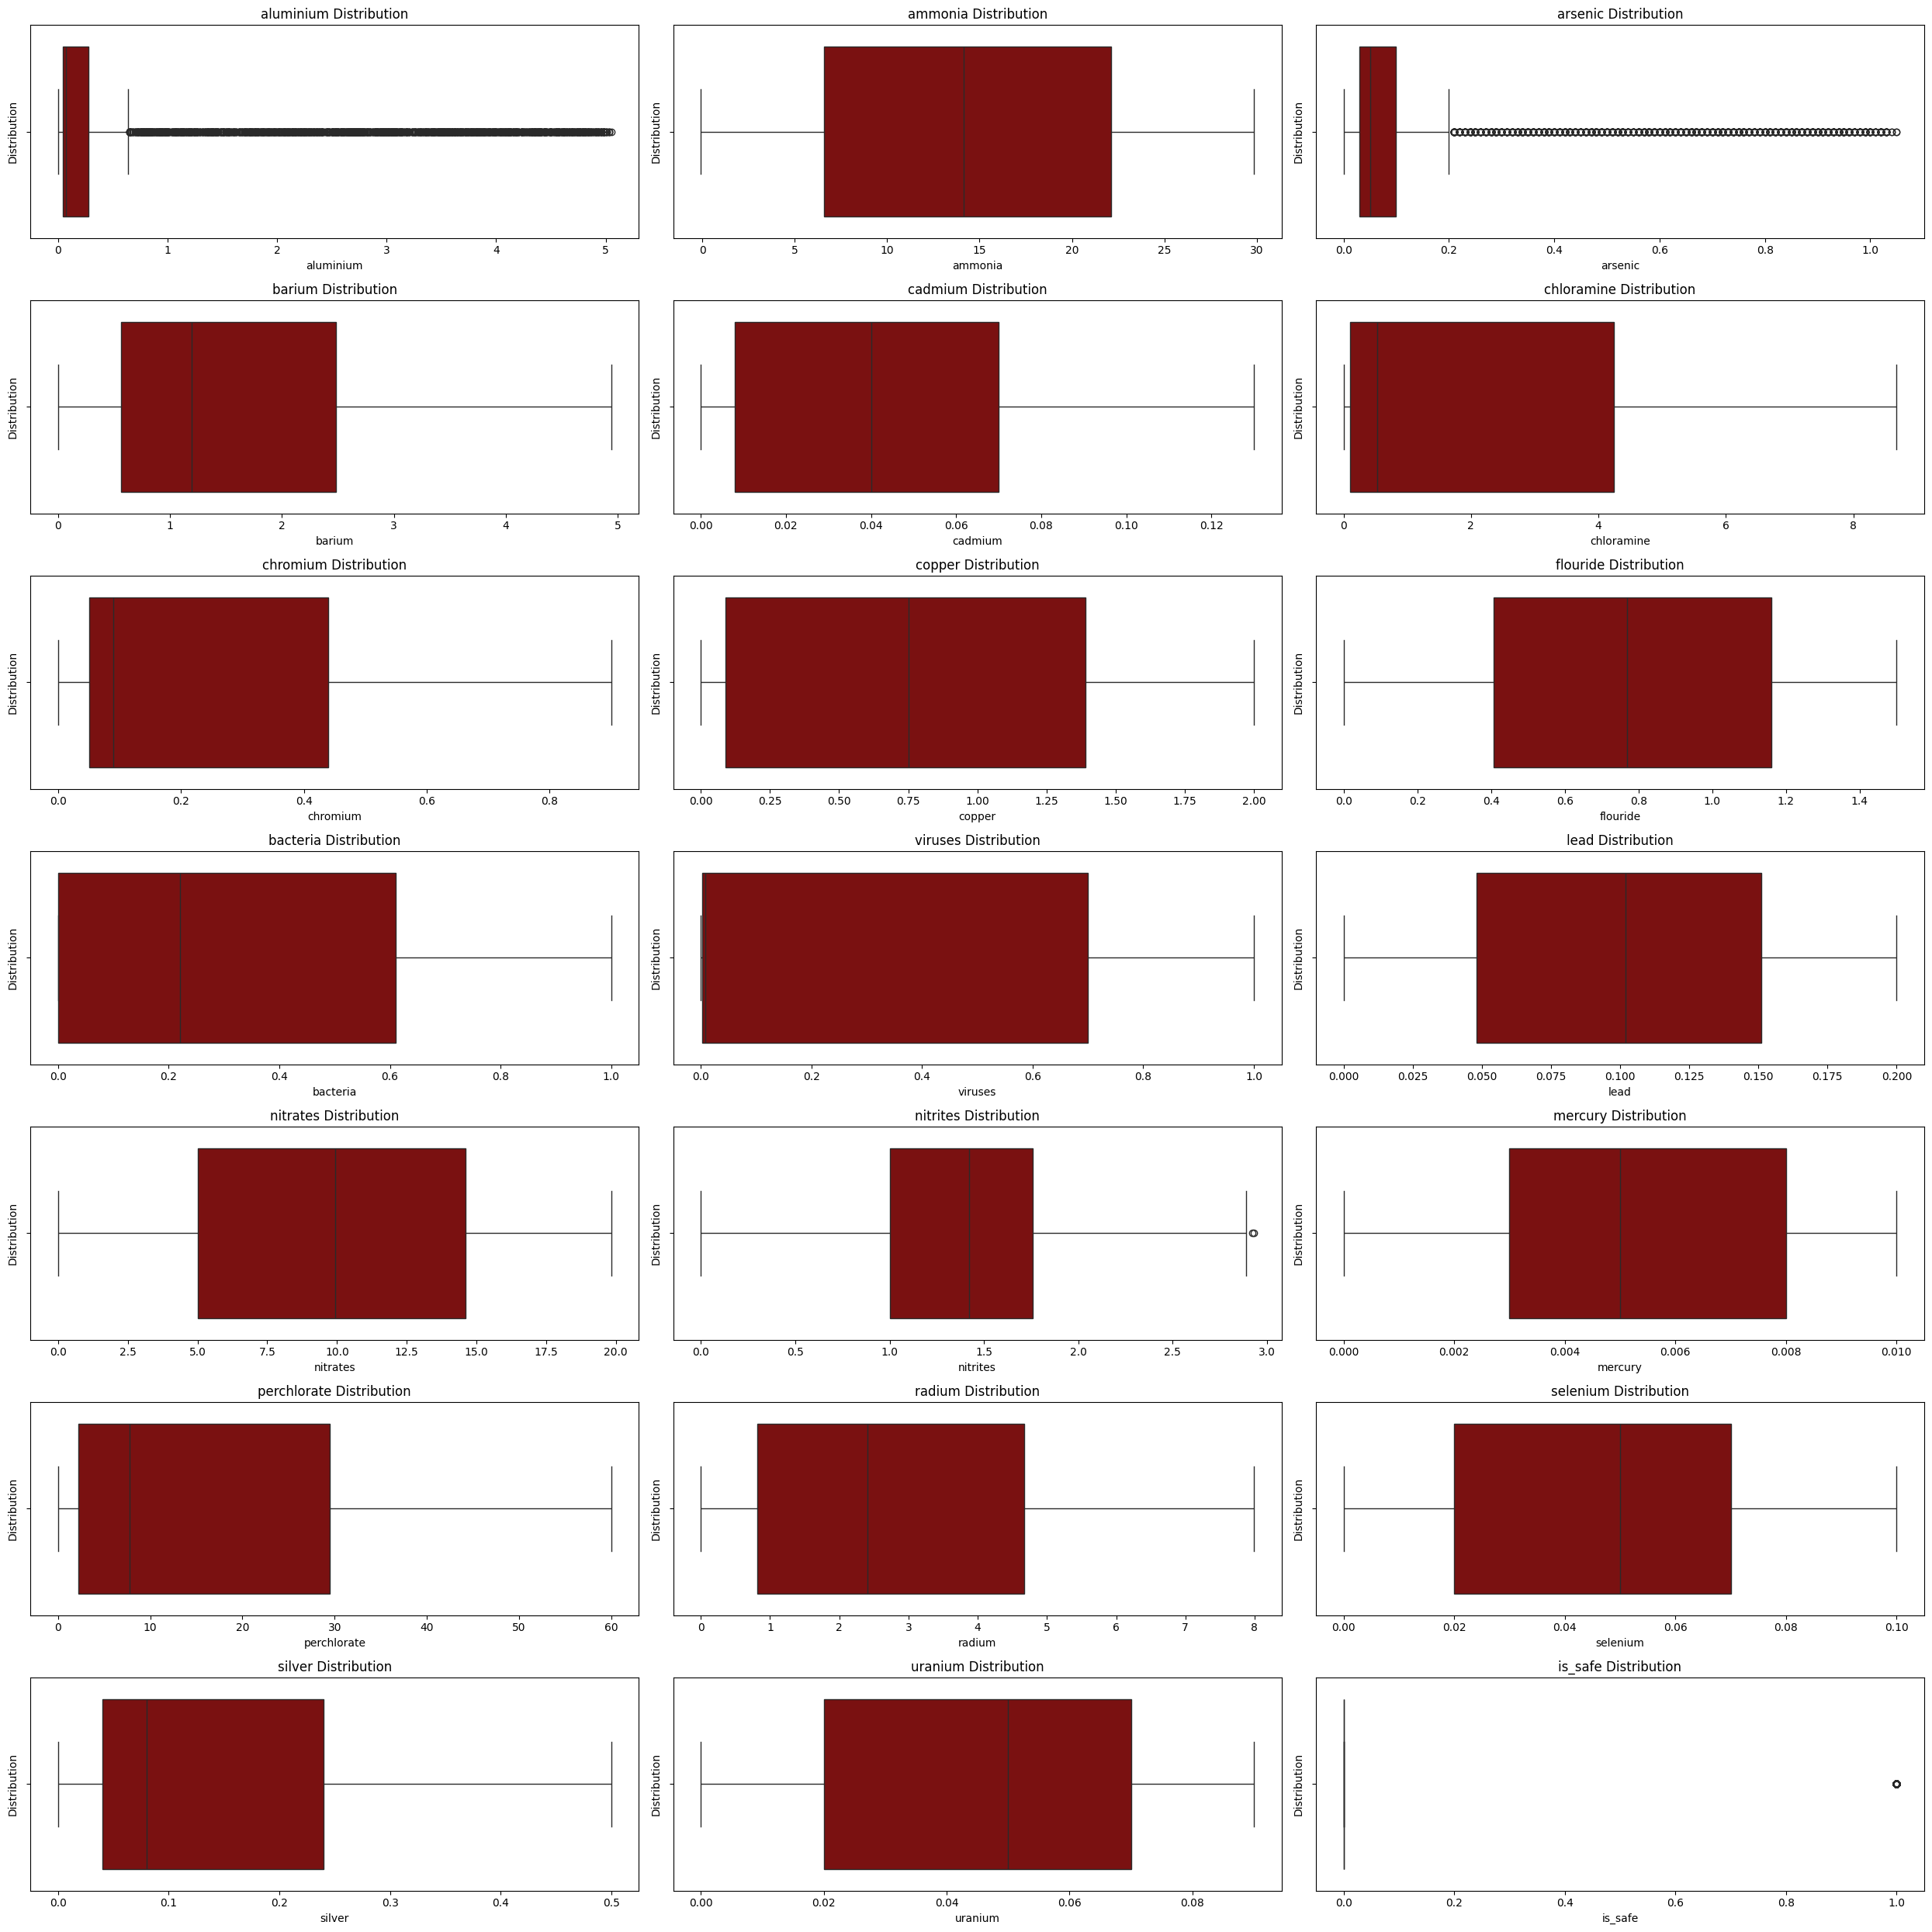

In [13]:
figx = plt.figure(figsize=(25, 25))
for i, col in enumerate(df.columns):
    ax = figx.add_subplot(7, 3, i+1)
    sns.boxplot(x = df[col].ffill(), color='darkred')
    ax.set_title(col + " Distribution", color='k')
    plt.ylabel('Distribution')
figx.tight_layout()



## Explanation:
- **Aluminium**: Shows extreme outliers above the main distribution

- **Arsenic**: Multiple outliers marked as individual points

- **Ammonia**: Wide box indicating high variability in normal range

- **Barium**: Several high-value outliers

- **Mercury**: Very tight box with defined outliers

- **Selenium**: Relatively small interquartile range

- **Silver**: Concentrated distribution with some outliers

- **Uranium**: Compact box with well-defined limits

- **Chloramine**: Box shows asymmetric distribution

- **Nitrates**: Long upper whisker indicating right skew

- **Perchlorate**: Wide range with numerous high outliers

- **is_safe**: Shows essentially binary distribution

- **Bacteria and Viruses**: Large number of zero values with outliers

- **Nitrites**: Relatively symmetric box with few outliers

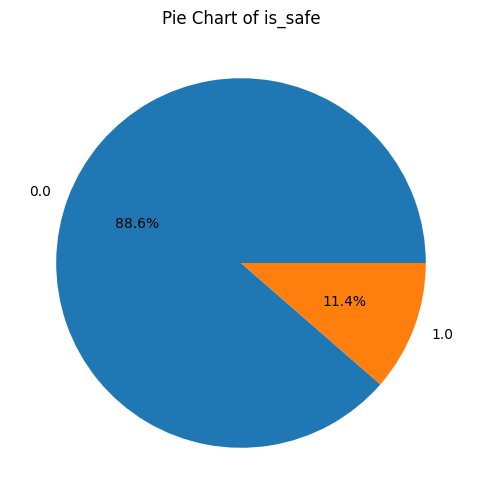

In [14]:
plt.figure(figsize=(10, 6))
plt.pie(df['is_safe'].value_counts(), labels = df['is_safe'].value_counts().index, autopct='%1.1f%%')
plt.title(f'Pie Chart of is_safe')
plt.show()

## Explanation:
- **is_safe**: Most samples are safe (11.4%), with 88.6% unsafe
- We sketch pie chart for is_safe because it is not sufficiently suitable for boxplot
- There is data inbalance for is_safe

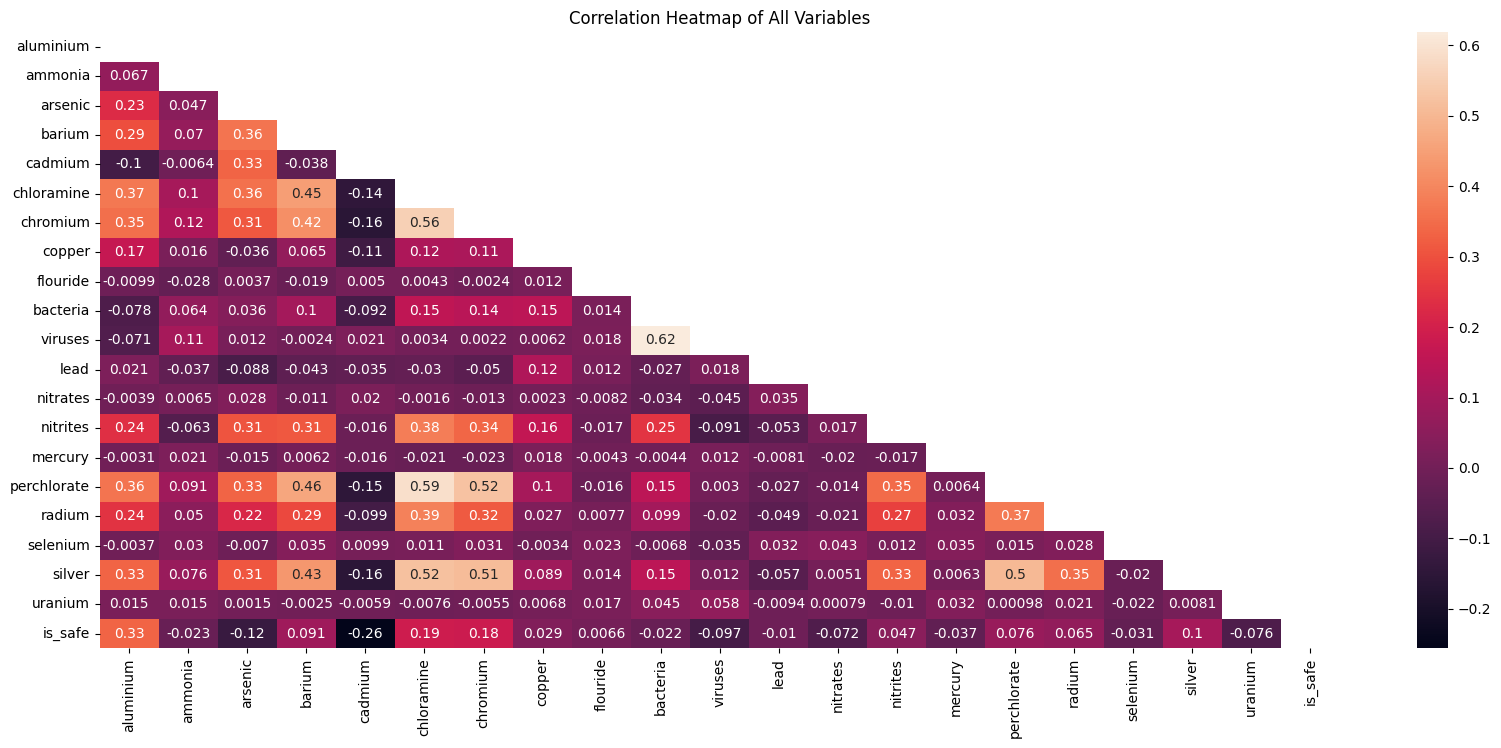

In [15]:
mask = np.triu(df.corr())
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, mask=mask)
plt.title('Correlation Heatmap of All Variables')
plt.show()

## Explanation:
- **HIGH Correlation:**
- **aluminium:** 0.33 (positive correlation)

- **arsenic:** -0.12 (negative correlation)

- **cadmium:** -0.26 (negative correlation)

- **chloramine:** 0.19 (positive correlation)

- **chromium:** 0.18 (positive correlation)
-------------------------------------
-------------------------------------
- **LOW Correlation:**
- **lead:** -0.01

- **flouride:** 0.0066

- **copper:** 0.029

- **bacteria:** -0.022

- **selenium:** -0.031

In [16]:
# Drop unrelated columns
df = df.drop(columns=['lead', 'flouride', 'copper', 'bacteria', 'selenium'])
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,viruses,nitrates,nitrites,mercury,perchlorate,radium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.000,16.08,1.13,0.007,37.75,6.78,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.650,2.01,1.93,0.003,32.26,3.21,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.003,14.16,1.11,0.006,50.28,7.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,0.710,1.41,1.29,0.004,9.12,1.72,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.001,6.74,1.11,0.003,16.90,2.41,0.06,0.02,1.0


In [17]:
# find first and last quantile
q1_alum = df['aluminium'].quantile(0.25)
q3_alum = df['aluminium'].quantile(0.75)
iqr_aluminium = q3_alum - q1_alum

q1_arsenic = df['arsenic'].quantile(0.25)
q3_arsenic = df['arsenic'].quantile(0.75)
iqr_arsenic = q3_arsenic - q1_arsenic

# find upper und lower limits
upper_aluminium = q3_alum + (1.5 * iqr_aluminium)
lower_aluminium = q1_alum - (1.5 * iqr_aluminium)

upper_arsenic = q3_arsenic + (1.5 * iqr_arsenic)
lower_arsenic = q3_arsenic - (1.5 * iqr_arsenic)

# Outliers
outliers_alum = df[(df['aluminium'] < lower_aluminium) | (df['aluminium'] > upper_aluminium)]
print('For Aluminium' ,outliers_alum['is_safe'].value_counts())

outliers_arsenic = df[(df['arsenic'] < lower_arsenic) | (df['arsenic'] > upper_arsenic)]
outliers_arsenic['is_safe'].value_counts()

For Aluminium is_safe
0.0    1140
1.0     591
Name: count, dtype: int64


,count
is_safe,
0.0,1556
1.0,78


## Explanation for handle outliers
**For Aluminum:**
- ⁠Among the outliers, we have a significant number of both safe (591) and unsafe (1140) water samples
- ⁠This suggests that the outlier values for aluminum contain meaningful patterns and valuable information about water safety
- ⁠Dropping these outliers would mean losing important data points that could help predict water safety

**For Arsenic:**
- ⁠The outliers are heavily skewed towards unsafe water samples (1556 unsafe vs 78 safe)
- ⁠This extreme imbalance suggests that unusually high or low arsenic levels are very strong indicators of unsafe water
- ⁠These outliers likely represent extreme contamination cases that might skew our model's overall understanding of typical arsenic levels

**The way to follow:**
- ⁠Keep aluminum outliers because they contain valuable patterns for both safe and unsafe water conditions
- ⁠Remove arsenic outliers because they represent extreme contamination cases that could distort the model's understanding of normal arsenic levels in water



# Step 5: Handle Outliers
- ⁠Remove arsenic outliers

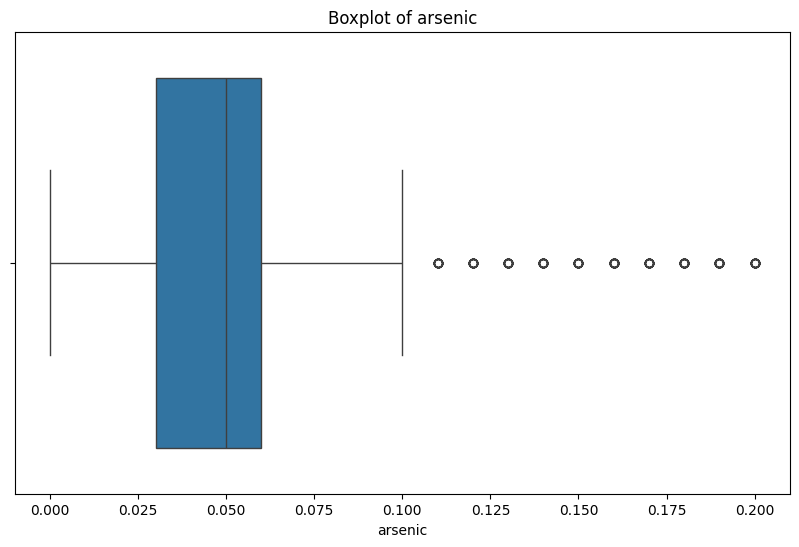

In [18]:
# Median Imputation
df.loc[(df['arsenic'] < lower_arsenic) | (df['arsenic'] > upper_arsenic), 'arsenic'] = df['arsenic'].median()
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['arsenic'])
plt.title(f'Boxplot of arsenic')
plt.show()

# Step 6: Data Normalization:
- Use StandardScaler to normalize the data
- Split data into training and test

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(columns='is_safe')
y = df['is_safe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

# Step 7: Clustering

In [21]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

scores = []
i = 2
for n_clusters in range(2,11):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(scaled_df)
    centers = km.cluster_centers_
    score = silhouette_score(scaled_df, preds, metric='euclidean')
    scores.append(score)

for score in scores:
    if score == max(scores):
        best_n_clusters = i
    i += 1

print ("For n_clusters = {}".format(best_n_clusters))

# Best cluster is 2 so we process with this value.

For n_clusters = 2


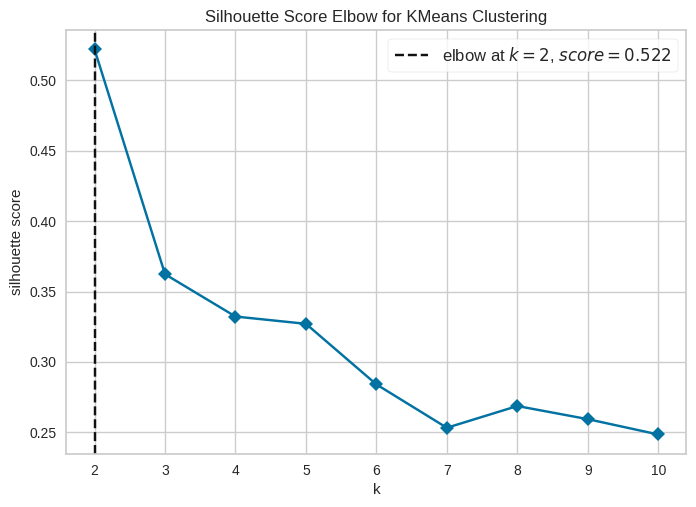

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(n_clusters=best_n_clusters)
visualizer = KElbowVisualizer(
    km, k=(2,11),metric ='silhouette', timings=False
)

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw the data

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_ds = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2","col3"]))

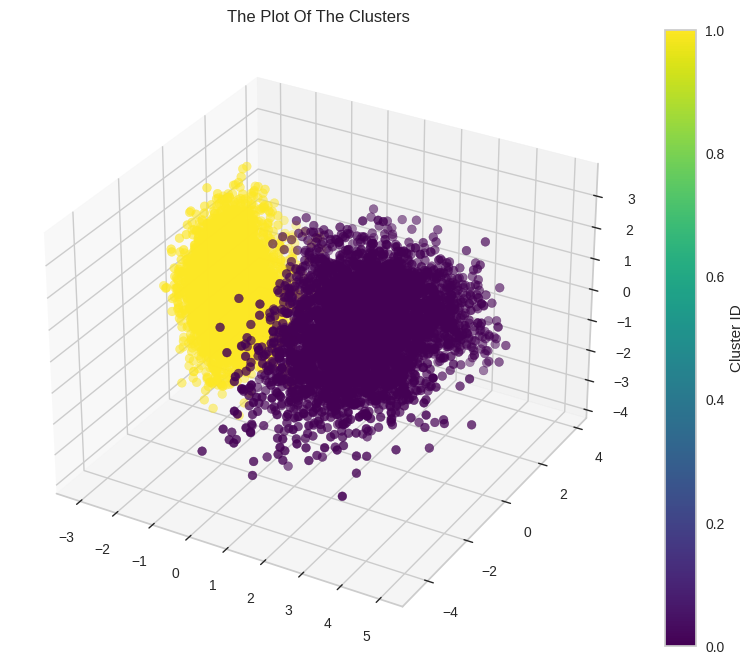

In [24]:
from sklearn.cluster import AgglomerativeClustering
# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
# Adding the Clusters feature to the orignal dataframe.

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    xs=PCA_ds['col1'], ys=PCA_ds['col2'], zs=PCA_ds['col3'],
    s=40, c=PCA_ds["Clusters"], cmap='viridis', marker='o'
)

ax.set_title("The Plot Of The Clusters")
plt.colorbar(scatter, ax=ax, label="Cluster ID")
plt.show()

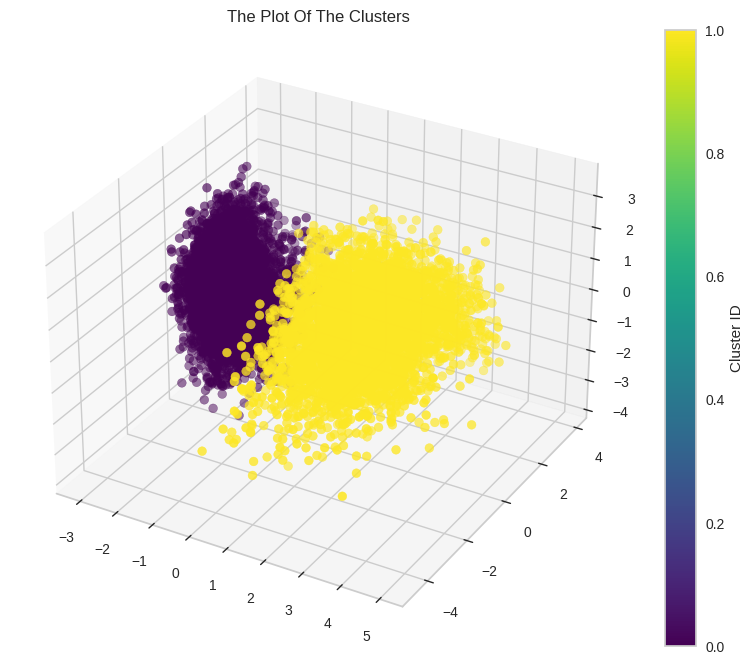

In [25]:
from sklearn.cluster import KMeans
# Initiating the Agglomerative Clustering model
KM = KMeans(n_clusters=2)
# fit model and predict clusters
yhat_AC = KM.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
# Adding the Clusters feature to the orignal dataframe.

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    xs=PCA_ds['col1'], ys=PCA_ds['col2'], zs=PCA_ds['col3'],
    s=40, c=PCA_ds["Clusters"], cmap='viridis', marker='o'
)

ax.set_title("The Plot Of The Clusters")
plt.colorbar(scatter, ax=ax, label="Cluster ID")
plt.show()

## Explanation:
- ⁠The clusters are clearly separated into two distinct groups (shown in yellow and purple), suggesting that Agglomerative Clustering has identified two main categories in your data.

- The color bar on the right shows the cluster IDs, with values ranging from 0.0 (purple) to 1.0 (yellow), indicating a binary clustering outcome.

# Step 8: Predictive Modelling


- **Random Forest Classifier:** The reason for choosing this model: Since it uses more than one decision tree, it reduces overfitting and is less affected by noisy data.

- **Decision Tree Classifier:** The reason for choosing this model: It is an easily understandable, fast and easy to calculate model, it makes feature selection according to the degree of importance. The negative aspect is that it may be overfitting.

- **XGB Classifier:** The reason for choosing this model: it is a fast model, it is less likely to be overfitting. This is achieved due to the L1, L2 parameters.

- **Logistic Regression Classifier:**  Simple and fast, highly effective for binary classification problems with good interpretability.

- **Support Vector Classifier:** The reason we chose this model:  It has generally high accuracy for medium-sized data sets, can model non-linear relationships with different kernel functions.


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 8.1: Parameter Selection

Fitting 5 folds for each of 100 candidates, totalling 500 fits
En iyi hiperparametreler:  {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'entropy'}
En iyi model skoru:  0.9266039051603905
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1045
         1.0       0.77      0.72      0.74       155

    accuracy                           0.94      1200
   macro avg       0.86      0.84      0.85      1200
weighted avg       0.93      0.94      0.93      1200



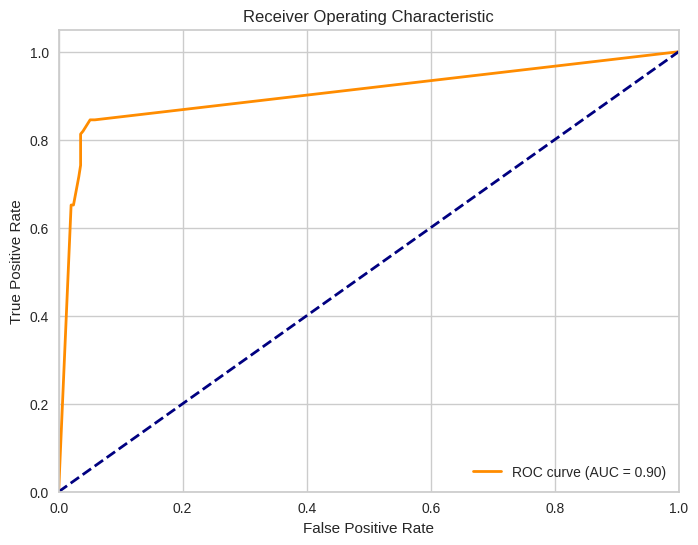

In [59]:
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maksimum derinlik
    'min_samples_split': [2, 5, 10],          # Bölünme için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],            # Lapa (leaf) için minimum örnek sayısı
    'criterion': ['gini', 'entropy']         # Kriter: Gini ya da Entropi
}

dt = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Eğitim verisi ile random_search'i fit et
random_search.fit(X_val, y_val)

# En iyi model ve hiperparametreleri yazdır
print("En iyi hiperparametreler: ", random_search.best_params_)
print("En iyi model skoru: ", random_search.best_score_)

# En iyi modeli seç
best_dt = random_search.best_estimator_

# Test seti üzerinde tahminler yap
y_pred = best_dt.predict(X_test)

# Classification report yazdır
print(classification_report(y_test, y_pred))

# Modelin tahmin olasılıklarını al
y_prob = best_dt.predict_proba(X_test)[:, 1]  # Pozitif sınıf için olasılık

# ROC eğrisini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [30]:
from sklearn.model_selection import RandomizedSearchCV

# Parametre alanı belirleyelim
param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1],
}
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.95, random_state=42)

# RandomizedSearchCV kullanma
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train_sample, y_train_sample)

# Sonuçları yazdırma
print(f"En iyi hiperparametreler: {random_search.best_params_}")
print(f"En iyi doğruluk (cross-validation): {random_search.best_score_:.4f}")


En iyi hiperparametreler: {'kernel': 'linear', 'gamma': 'scale', 'C': 1}
En iyi doğruluk (cross-validation): 0.9175


# Step 9: Model Evaluation and Visualizations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or

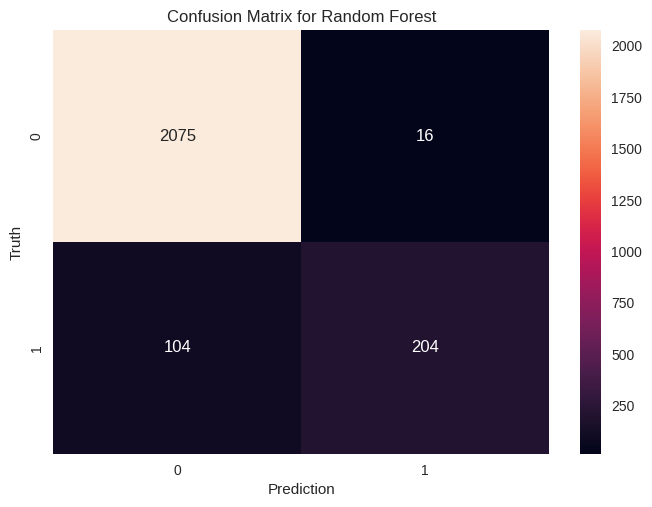

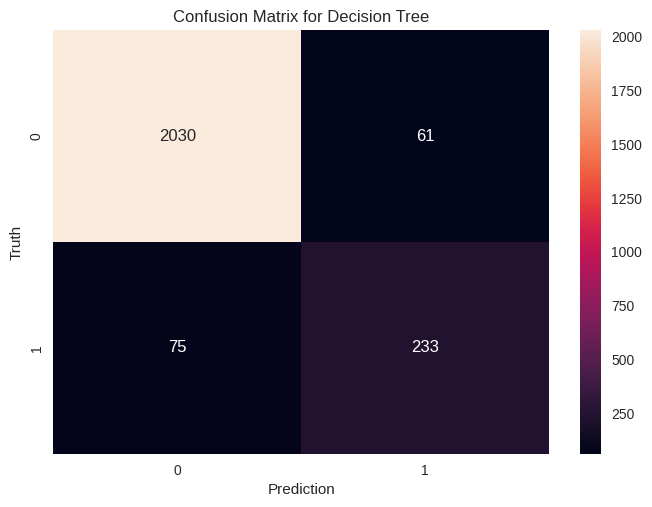

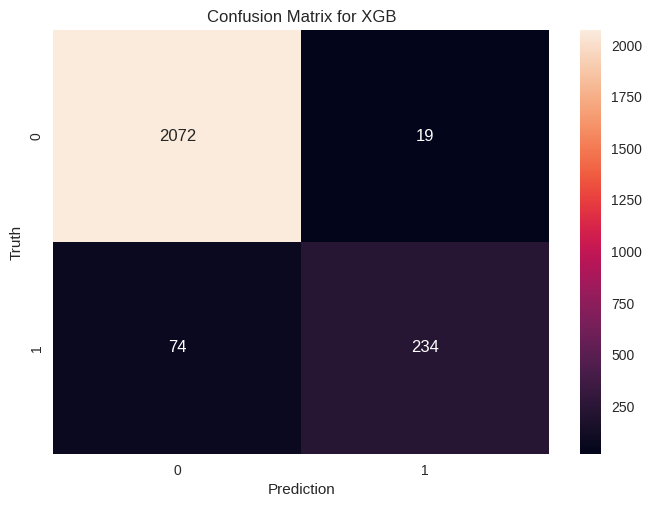

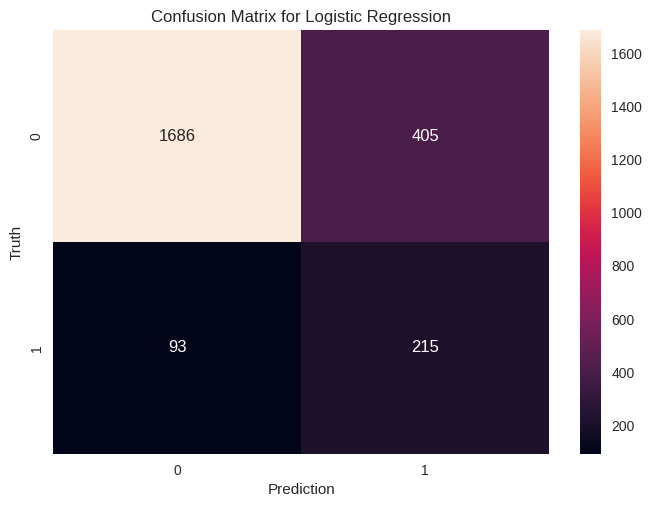

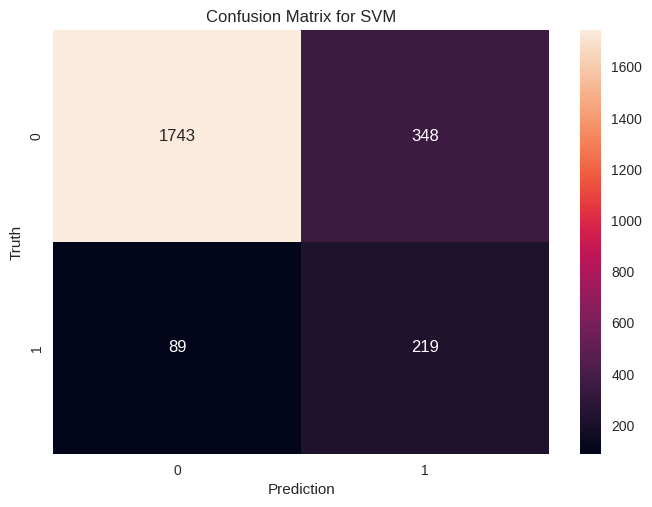

In [37]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

list_conf = {}

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train_scaled, y_train)


y_pred_rf = rf.predict(X_test_scaled)
list_conf['Random Forest'] = y_pred_rf


from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train_scaled, y_train)


y_pred_dt = dt.predict(X_test_scaled)
list_conf['Decision Tree'] = y_pred_dt


import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
list_conf['XGB'] = y_pred_xgb


from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
model_logistic = LogisticRegression(max_iter=1000)

X_train_resample, y_train_resample = sm.fit_resample(X_train_scaled, y_train)
model_logistic.fit(X_train_resample, y_train_resample)

y_pred_logistic = model_logistic.predict(X_test_scaled)
list_conf['Logistic Regression'] = y_pred_logistic


from sklearn.svm import SVC




model_svm.fit(X_train_resample, y_train_resample)

y_pred_svm = svm_model.predict(X_test_scaled)
list_conf['SVM'] = y_pred_svm


for name, i in list_conf.items():
    conf = confusion_matrix(y_test, i)
    sns.heatmap(conf, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title('Confusion Matrix for '+ name)
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show()



In [34]:
svm_model = SVC(kernel='linear', max_iter=10000, random_state=1, probability=True, gamma='scale', C=1)
svm_model.fit(X_train_resample, y_train_resample)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=1, kernel='linear', max_iter=10000, probability=True, random_state=1)

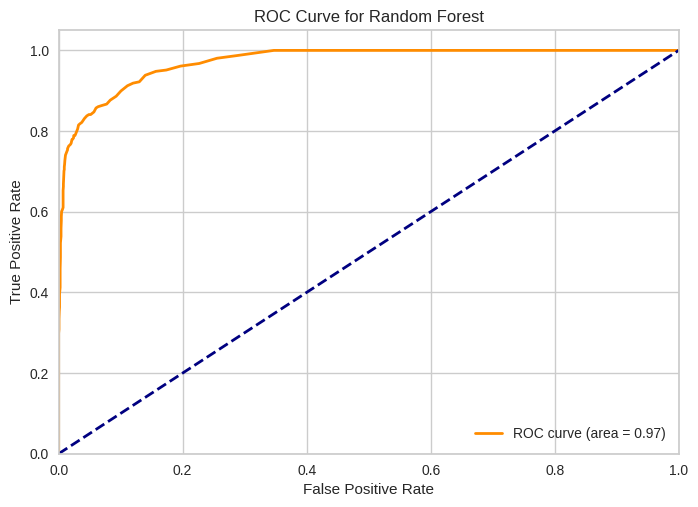

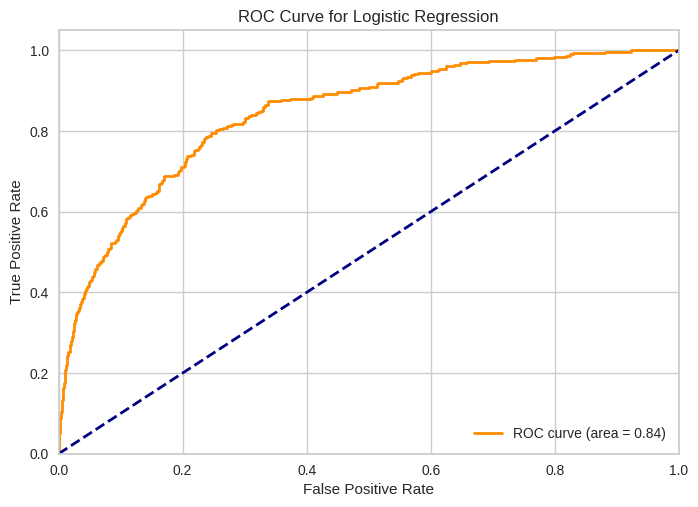

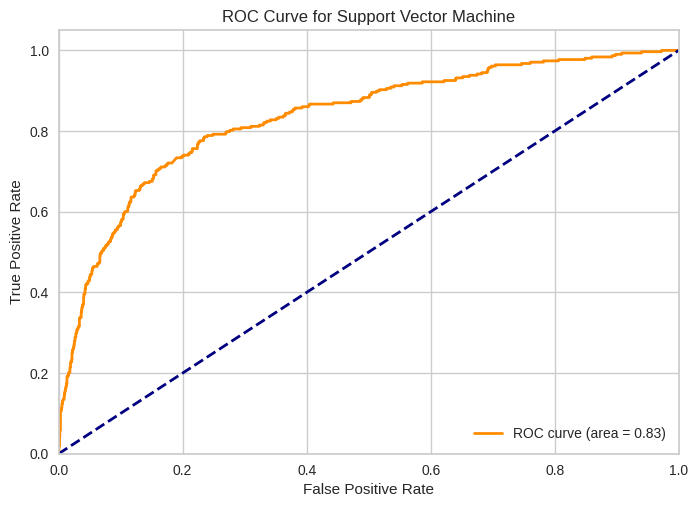

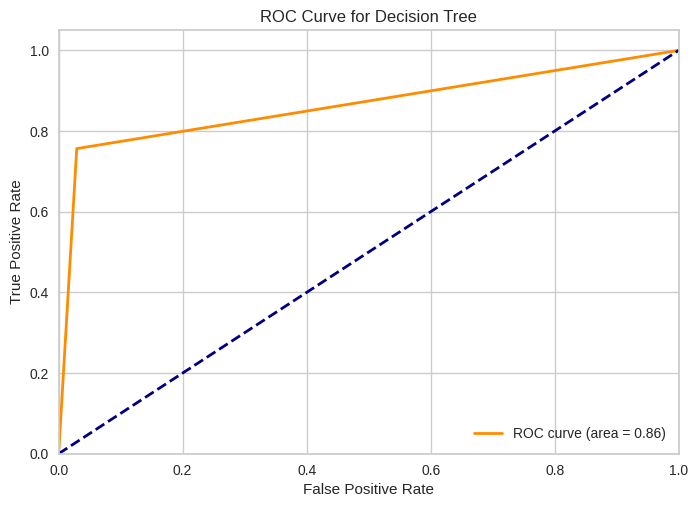

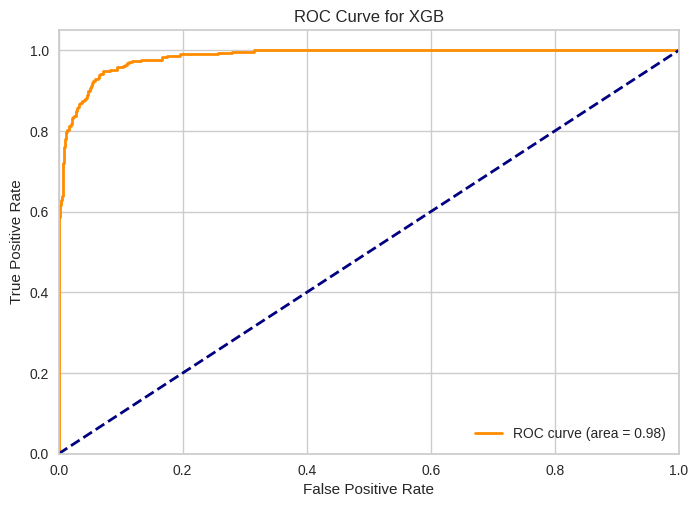

In [36]:
from sklearn.metrics import roc_curve, auc

list_prob = {}
y_pred_prob_rf = rf.predict_proba(X_test_scaled)[:, 1] 
list_prob['Random Forest'] = y_pred_prob_rf

y_pred_prob_logi = model_logistic.predict_proba(X_test_scaled)[:, 1]
list_prob['Logistic Regression'] = y_pred_prob_logi

y_pred_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
list_prob['Support Vector Machine'] = y_pred_prob_svm

y_pred_proba_dt = dt.predict_proba(X_test_scaled)[:,1]
list_prob['Decision Tree'] = y_pred_proba_dt

y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
list_prob['XGB'] = y_pred_prob_xgb

for name, i  in list_prob.items():
    fpr, tpr, threshold = roc_curve(y_test, i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for ' + name)
    plt.legend(loc='lower right')
    plt.show()



Random Forest: This model performed exceptionally well, safely misclassifying only 16 dangerous water samples. This low false negative rate demonstrates the suitability of the model for this critical application. The Random Forest model also achieved a strong AUC score of 0.97.

XGBoost: Similar to Random Forest, XGBoost performed admirably with only 19 hazardous water samples being incorrectly classified as safe. This performance, combined with a high AUC score of 0.98, positions XGBoost as a strong contender.

Decision Tree: While the Decision Tree model offered interpretability, it exhibited a higher false negative rate, misclassifying 61 hazardous water samples. Furthermore, its AUC score of 0.86 indicates a less robust performance compared to Random Forest and XGBoost.

Logistic Regression: This model showed significantly poor fit, misclassifying 405 hazardous water samples as safe. This high false negative rate and low AUC score of 0.84 make Logistic Regression unsuitable for this task.

SVM: The SVM model also struggled with a high false negative rate, misclassifying 348 samples of hazardous water. This, together with an AUC score of 0.83, indicates sub-optimal performance for this dataset.


For critical applications such as water safety, it is crucial to minimise false negatives (the classification of dangerous water as safe). Therefore, Random Forest and XGBoost are the most appropriate choices due to their high performance and relatively low false negative rate. Logistic Regression and SVM were inadequate for this specific task. Decision Tree, on the other hand, although advantageous in terms of interpretability, should be used with caution due to its higher false negative rate.

In conclusion, since accuracy and minimising the false negative rate are the priorities, Random Forest and XGBoost stand out.